# End to End Medial Diagnostic Use Case 

Steps of the project:
0. Create a virtual environment with python=3.8.13
1. Import and view the data 
2. Check the data for Sanity
3. Perform EDA on data set 
4. Preprocess the data for modelling
5. Fit and Evlaute various Models
6. Optimize the chosen model
7. Interpret the optimized model
8. Pickle and save the model as a pipeline
9. Deploy the model pipeline in streamlit
10. Scale model to cloud using git and streamlit sharing
    

In [1]:
!pip install imbalanced-learn

In [2]:
!pip install xgboost

In [3]:
!pip install shap

In [3]:
# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

#for model interpretation
import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


### 1. Import and view the data 

In [4]:
data=pd.read_csv('data.csv')

In [5]:
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [6]:
data.shape


(768, 10)

###  Check the data for Sanity

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [8]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [10]:
# check for any other non real characters
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. Data set has 768 rows and 10 columns( 1 redundant)
2. Dataset has no direct nulls but has nulls imputed as 0
3. Dataset has only 1 categorical variable the Outcome


In [11]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [12]:
# drop the redundant column
data=data.drop('Unnamed: 0', axis=1)

In [13]:
# treat the nulls
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [14]:
#encode categoricals
df=data.copy()
d={'Yes':1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [15]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Perform EDA on data set 
1. UNIVARIATES- NUMERICALS
2. UNIVARIATES-CATEGORICALS
3. BIVARIATES-NUMERICAL vs CATEGORICAL
4. BIVARIATES- NUMERICALS VS NUMERICLAS
5. MULTIVARIATE CHARTS 
6. Correlations and Heatmaps 

##### 1. UNIVARIATES

In [16]:
def histograms(data):
    print('Univariate Histogram')
    data.hist()
    plt.tight_layout()
    plt.show()
    

Univariate Histogram


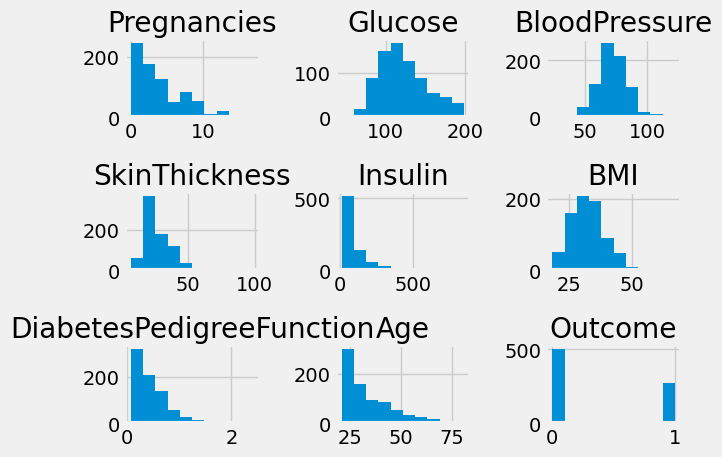

In [17]:
histograms(df)

In [18]:
def barchart(data, feature):
    print("Barchart of Categoricals")
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
    plt.show()

Barchart of Categoricals


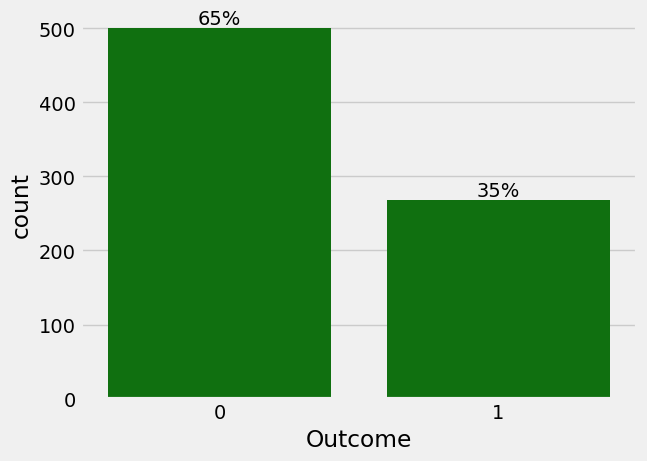

In [19]:
barchart(data=df, feature='Outcome')

**Observations**
Outcome variable is highly imbalanced. We need to solve for data imbalance 

In [20]:
def boxpolot_histplot(data, feature, figsize=(12,7), bins=None):
    print("Univariates of ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data,x=feature, showmeans=True, ax=ax_box, color='violet')
    
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='winter') if bins else\
         sns.histplot(data=data,x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(),linestyle='--', color='green')
    plt.axvline(data[feature].median(), linestyle='-', color='black')
    plt.show()
    
    
    

Univariates of  Pregnancies


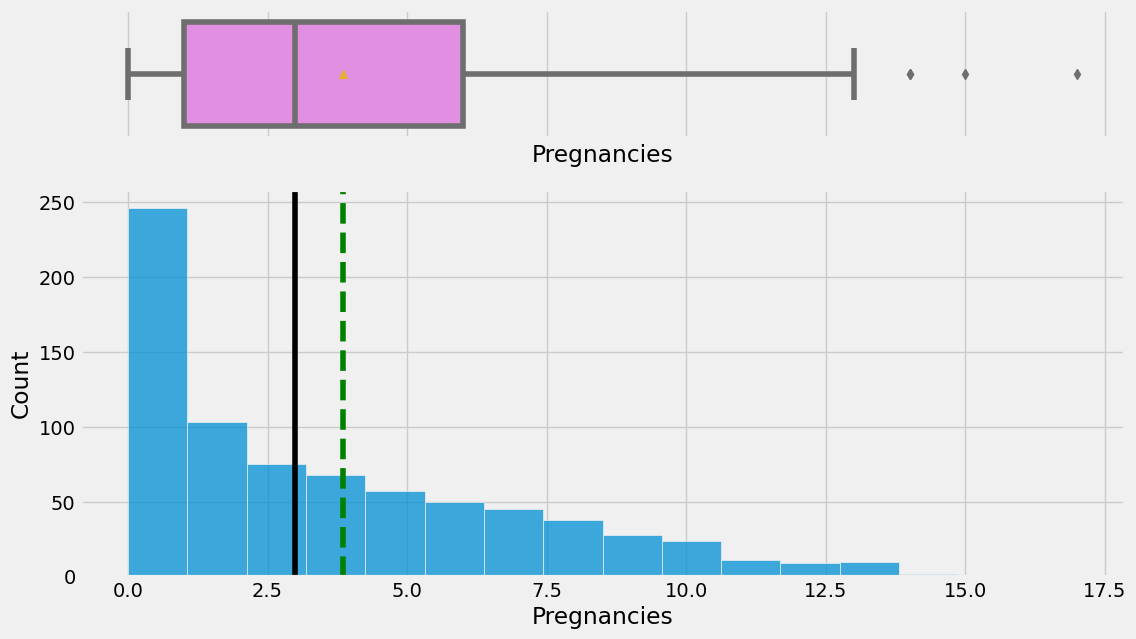

Univariates of  Glucose


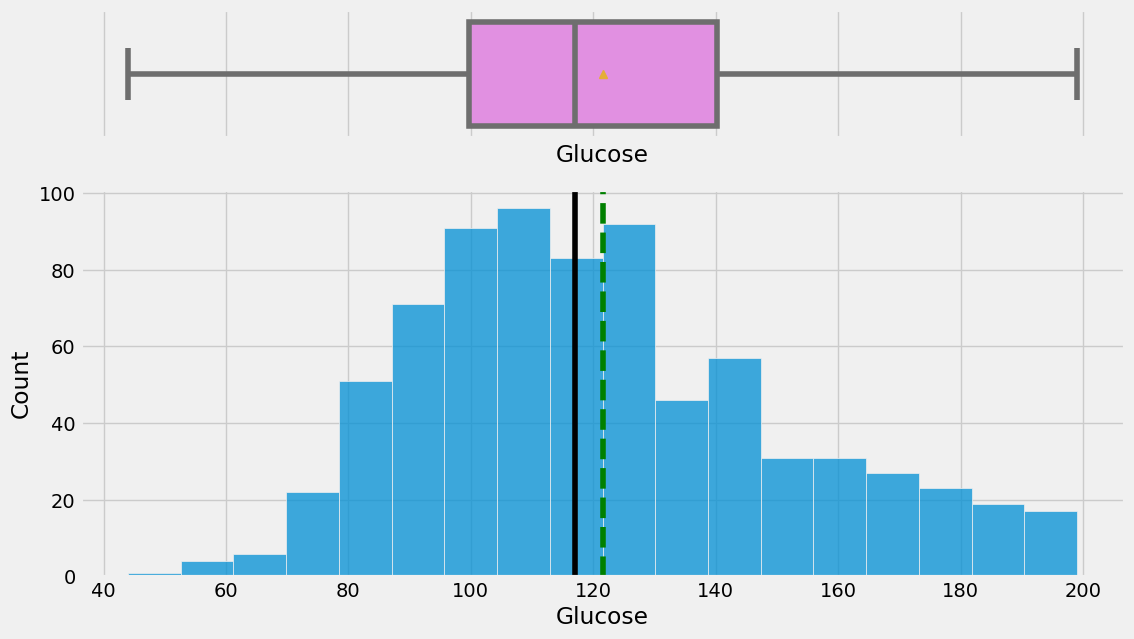

Univariates of  BloodPressure


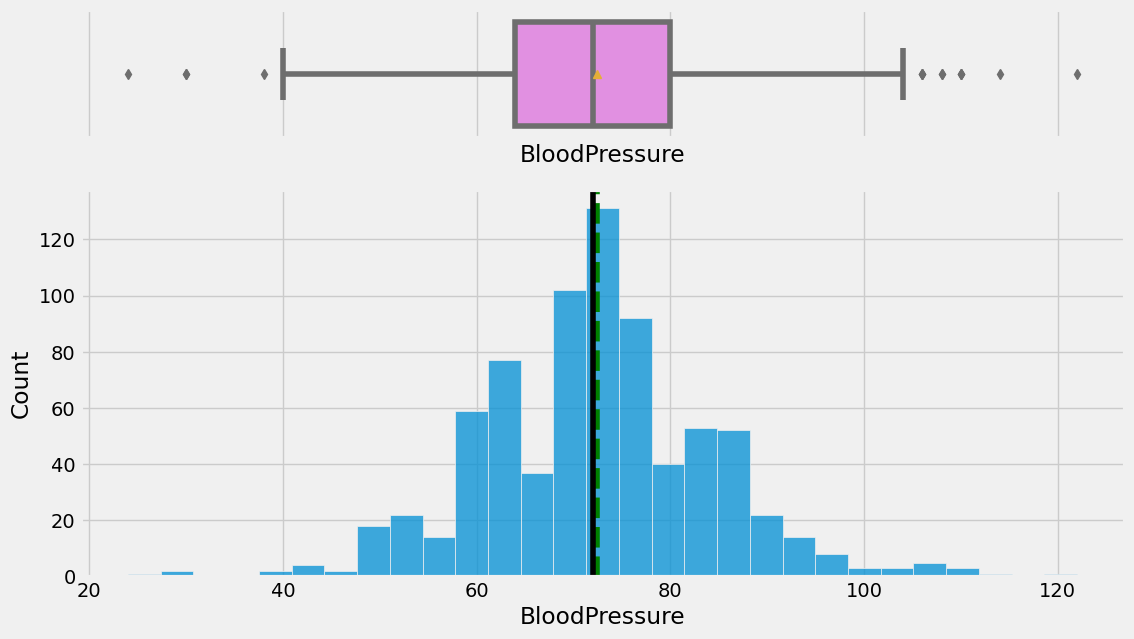

Univariates of  SkinThickness


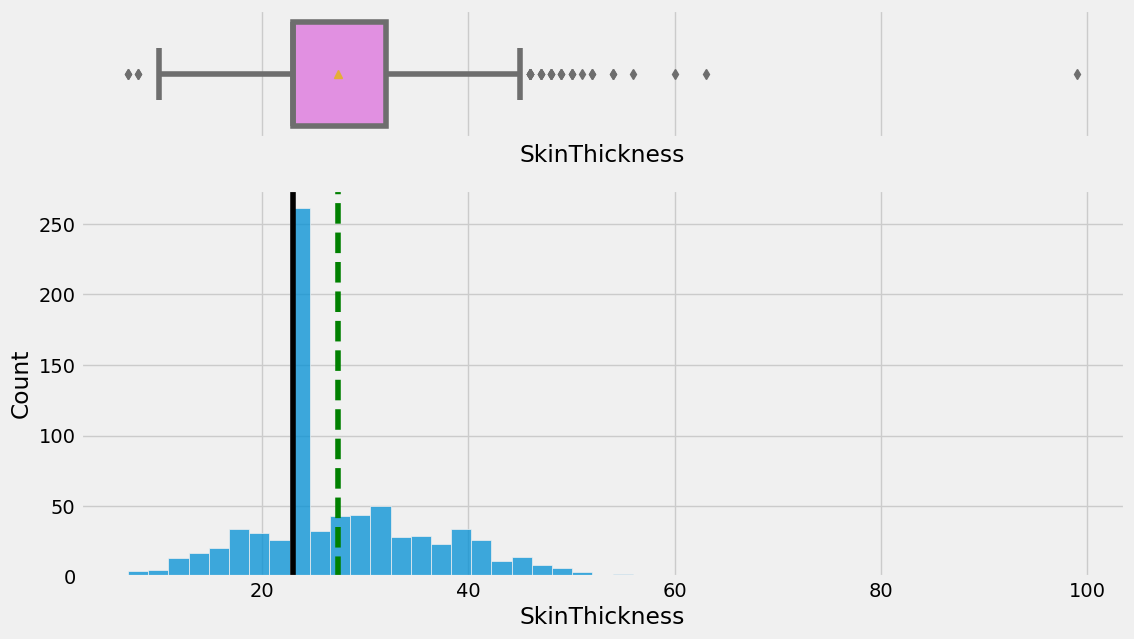

Univariates of  Insulin


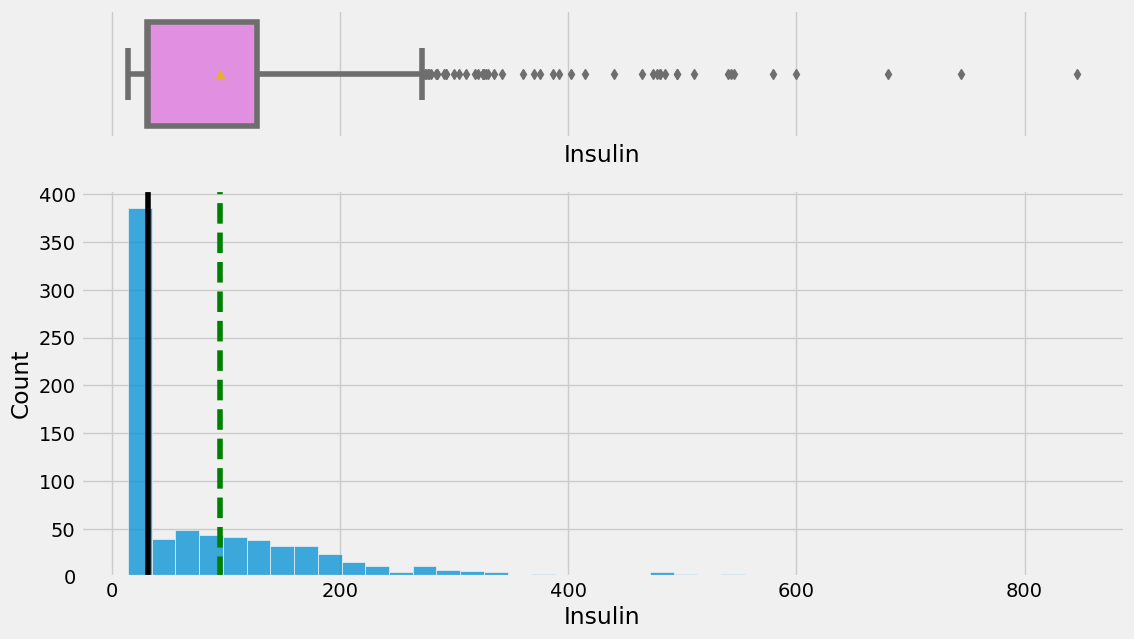

Univariates of  BMI


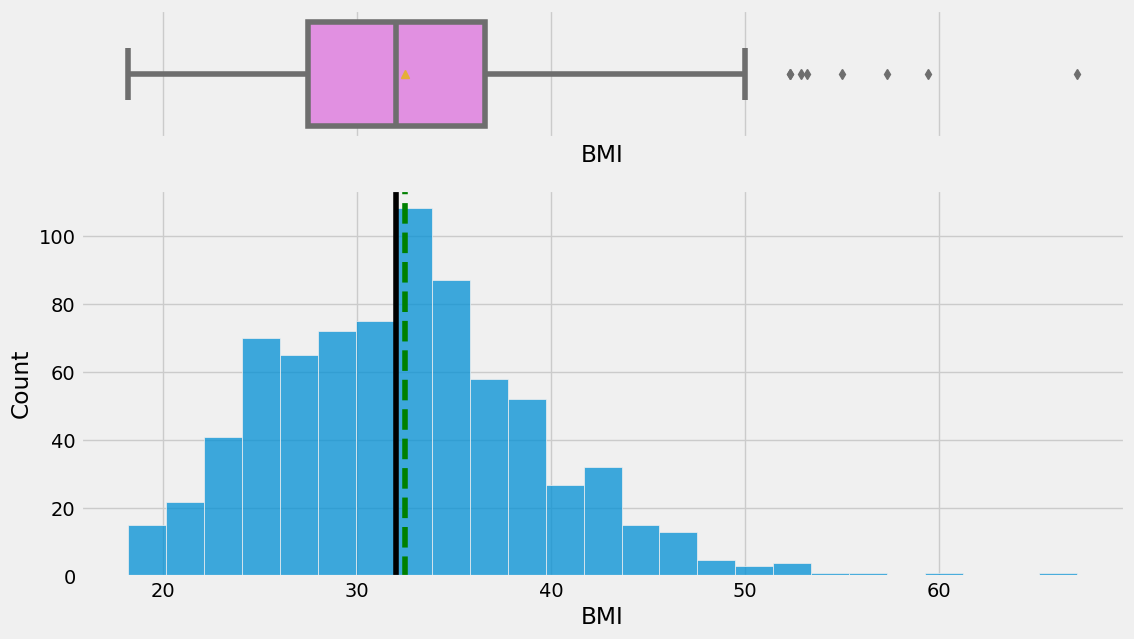

Univariates of  DiabetesPedigreeFunction


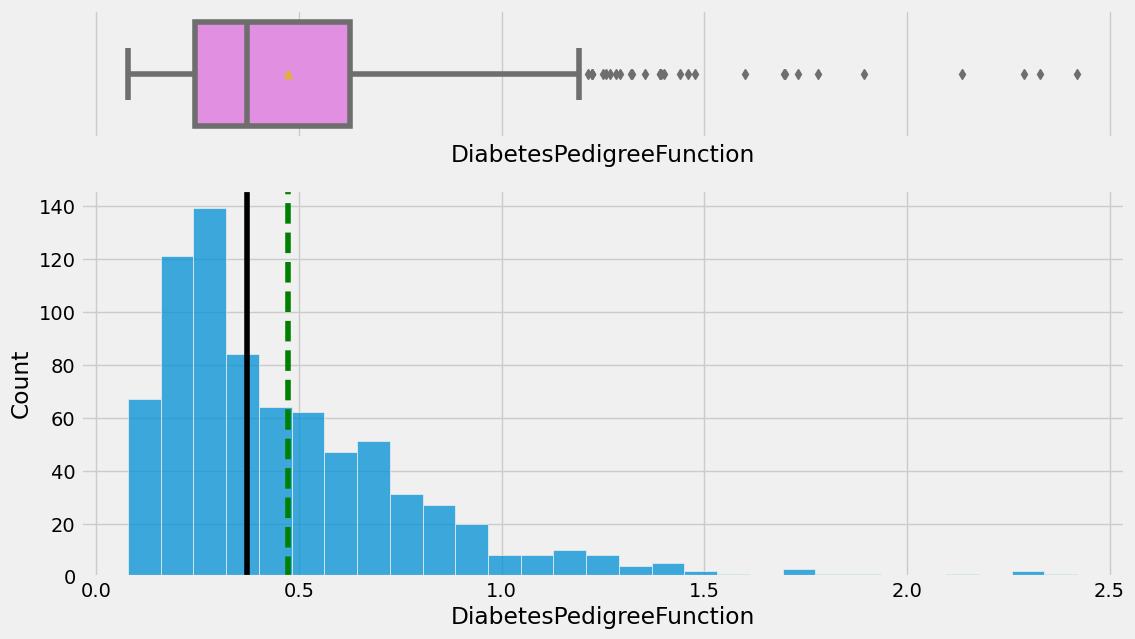

Univariates of  Age


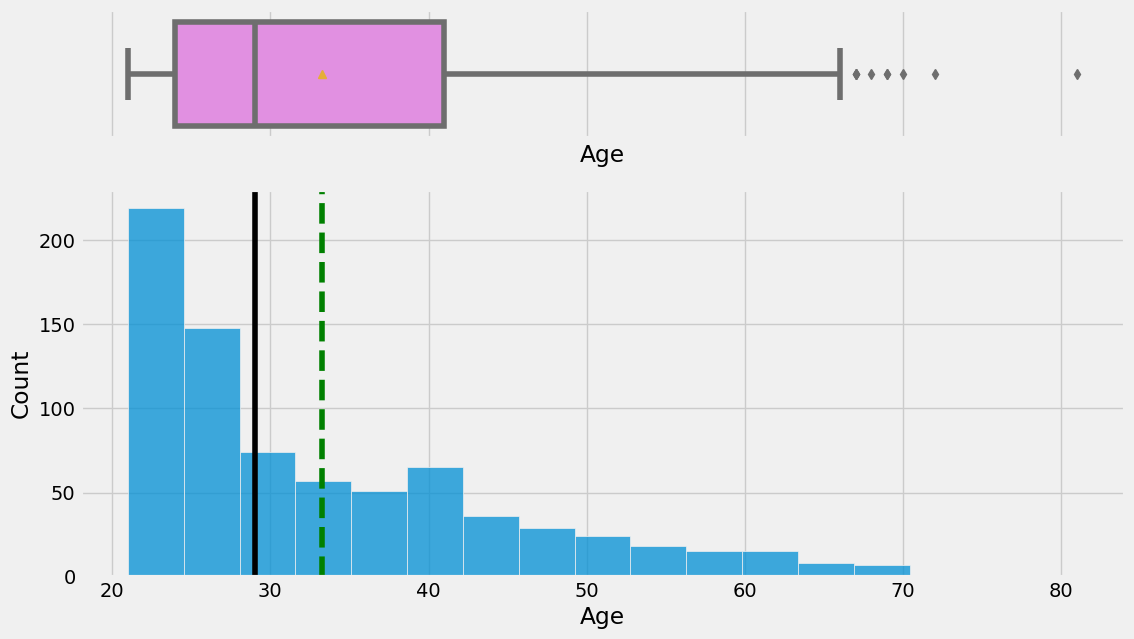

Univariates of  Outcome


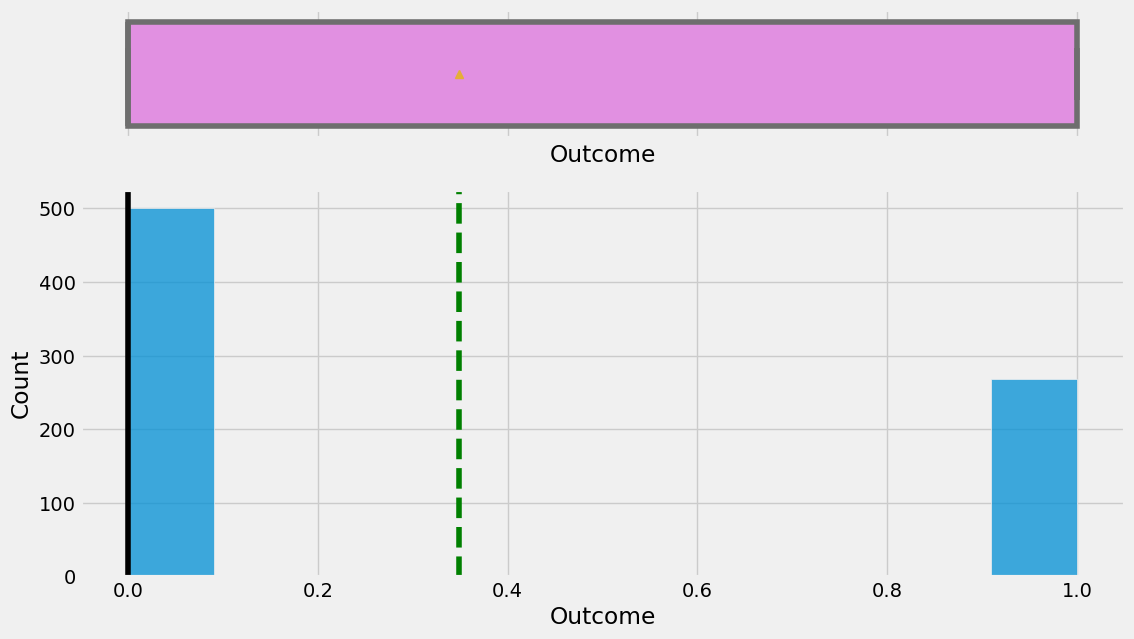

In [21]:
for col in df.select_dtypes(exclude='O').columns:
    boxpolot_histplot(data=df, feature=col)

**Observations**
1. Pregnancies has some suspect outliers which have to be looked upon
2. Skin thickness also has some suspect outliers which need to be taken care of 
3. Insulin is highly right skewed aand may need to be engineered
4. Diabetes pedigree function is also highly right skewed and needs to be engineered.
5. Outcome is highly imbalanced and may need balancing.

##### BIVARIATES-NUMERICAL vs CATEGORICAL

In [22]:
def catnums(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar',color='orange')
    plt.show()

Bivariate Barchart between Outcome and Pregnancies


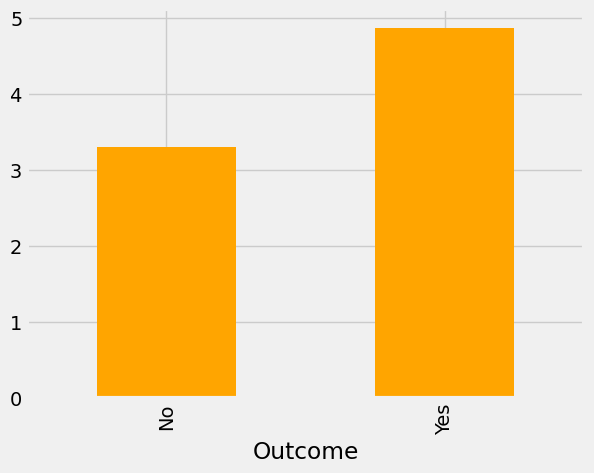

Bivariate Barchart between Outcome and Glucose


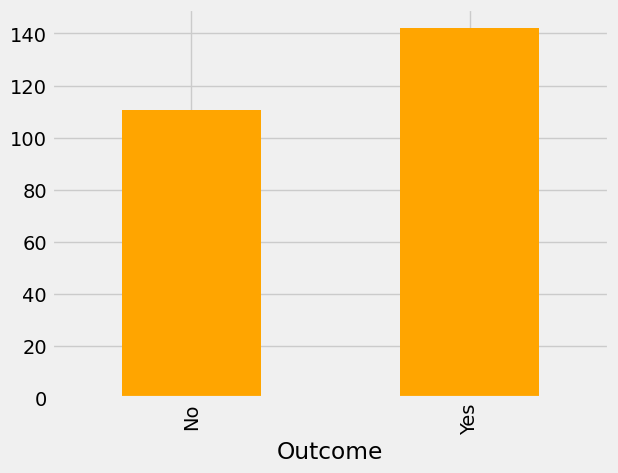

Bivariate Barchart between Outcome and BloodPressure


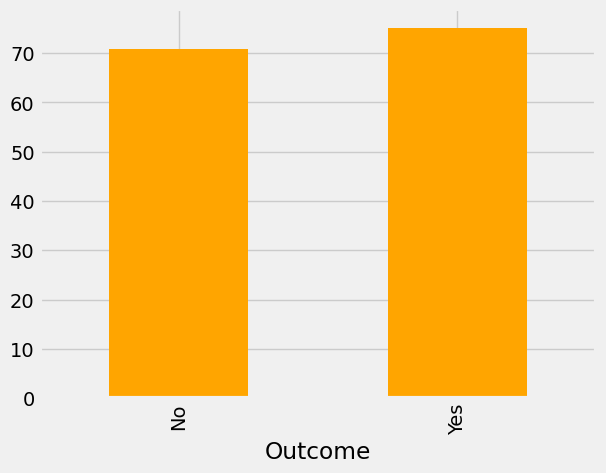

Bivariate Barchart between Outcome and SkinThickness


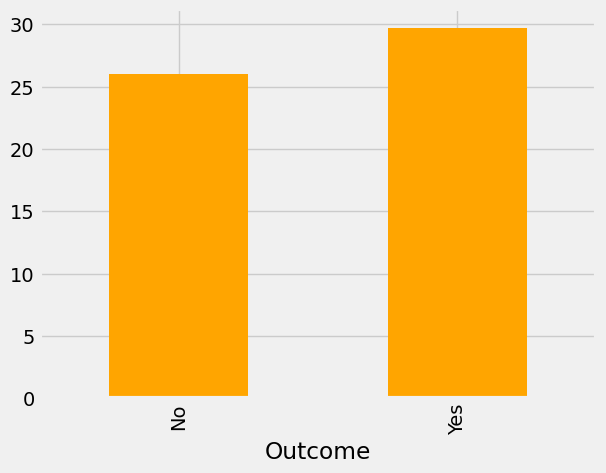

Bivariate Barchart between Outcome and Insulin


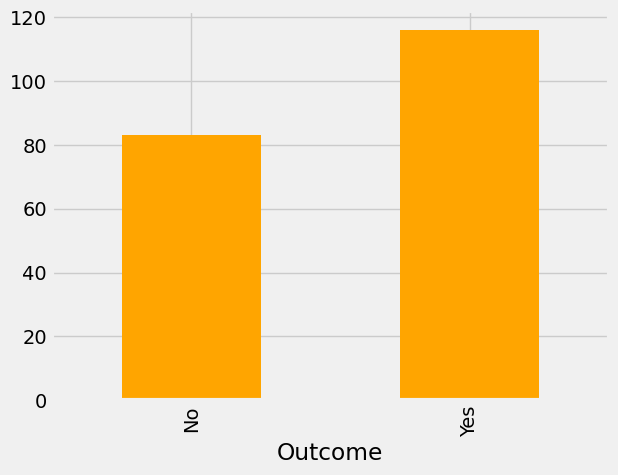

Bivariate Barchart between Outcome and BMI


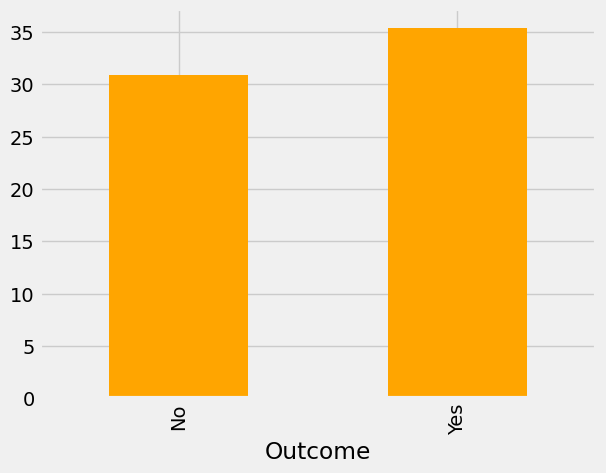

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


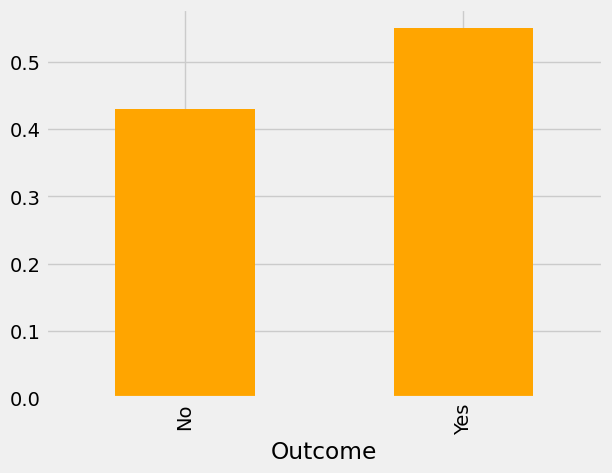

Bivariate Barchart between Outcome and Age


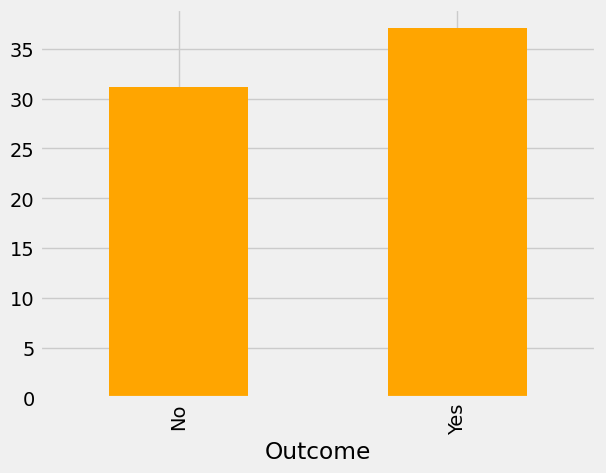

In [23]:
for col in data.select_dtypes(exclude='O').columns:
    catnums(data=data, feature1='Outcome', feature2=col)

**Observations**
Woman with higher pregnancies, higher diabetes predigree functions and Insulin use are more likely to be diabetic

##### BIVARIATES-NUMERICAL vs NUMERICAL

In [24]:
def lineplot_scatterplot(data, feature1, feature2):
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.show()

Bivariates between Pregnancies and Pregnancies


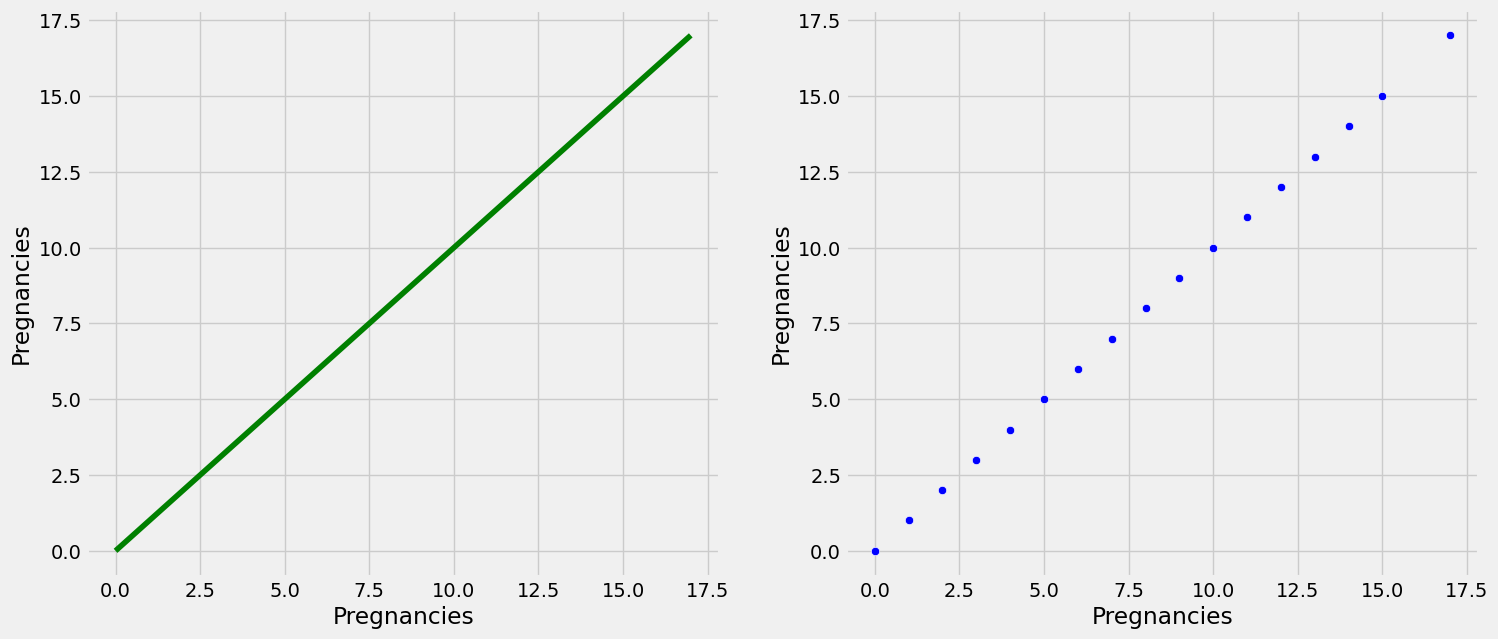

Bivariates between Pregnancies and Glucose


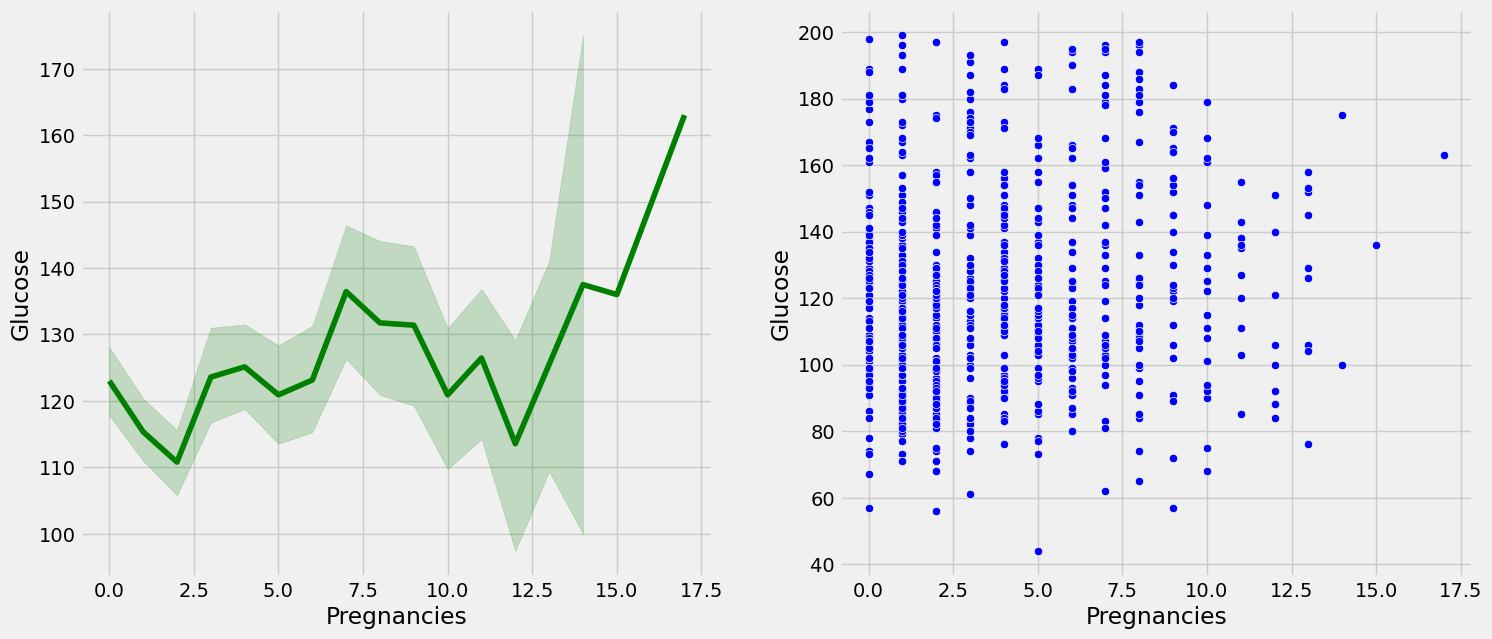

Bivariates between Pregnancies and BloodPressure


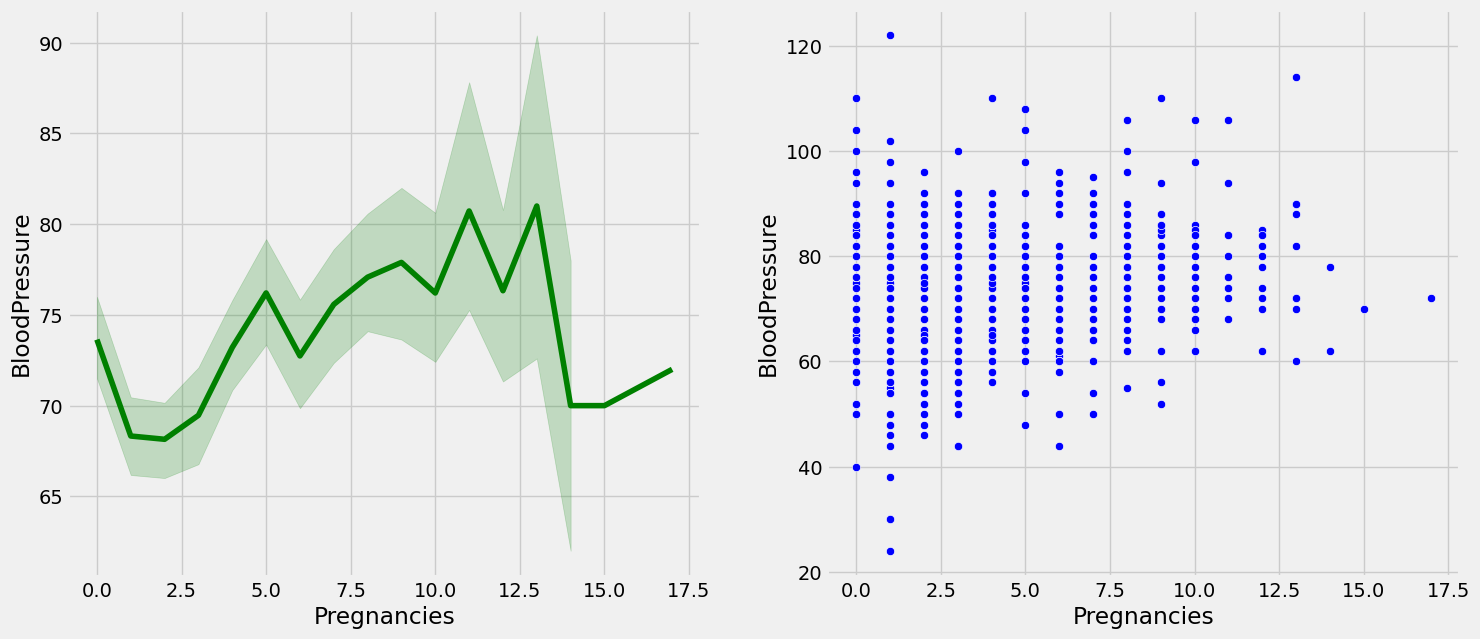

Bivariates between Pregnancies and SkinThickness


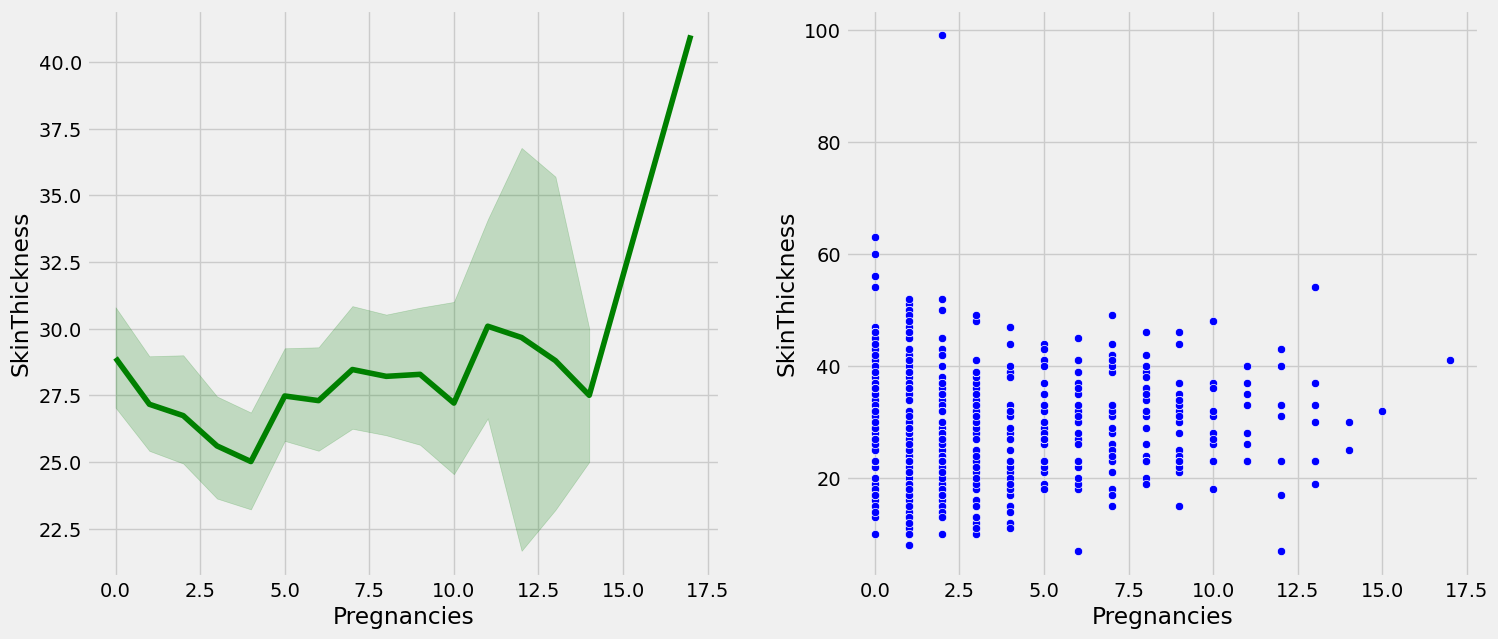

Bivariates between Pregnancies and Insulin


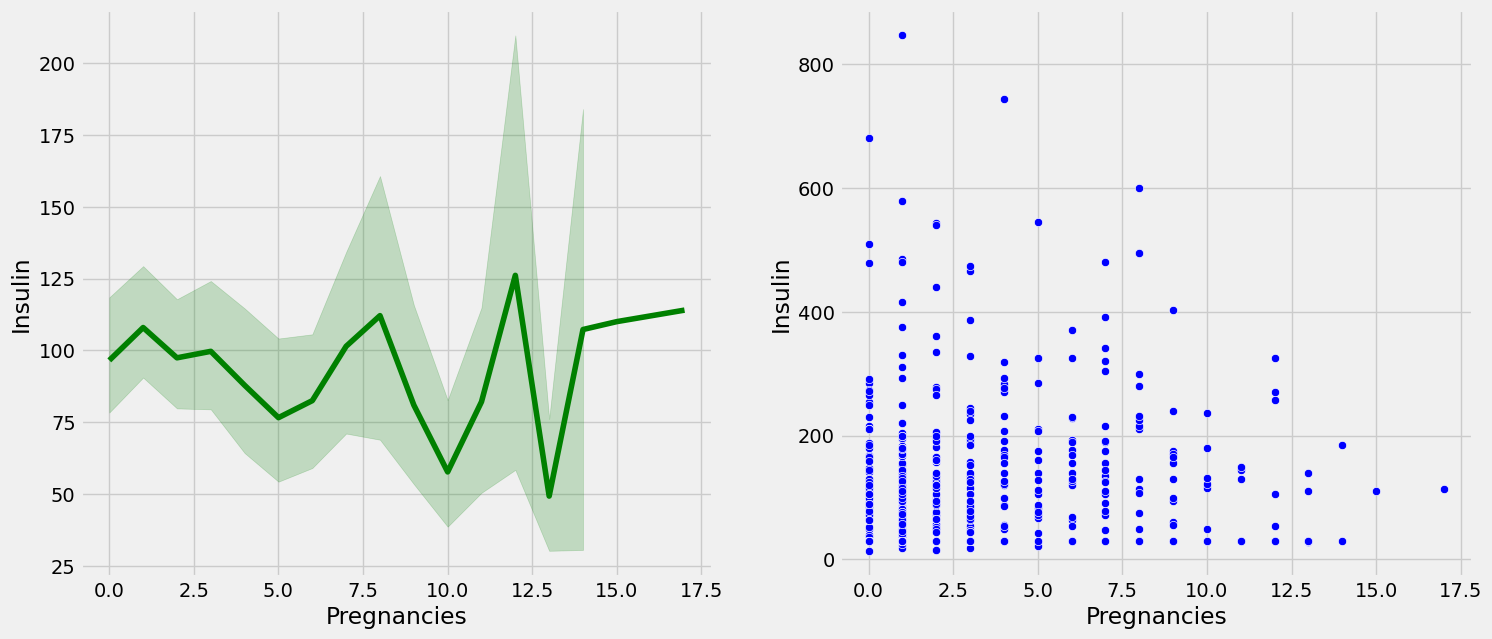

Bivariates between Pregnancies and BMI


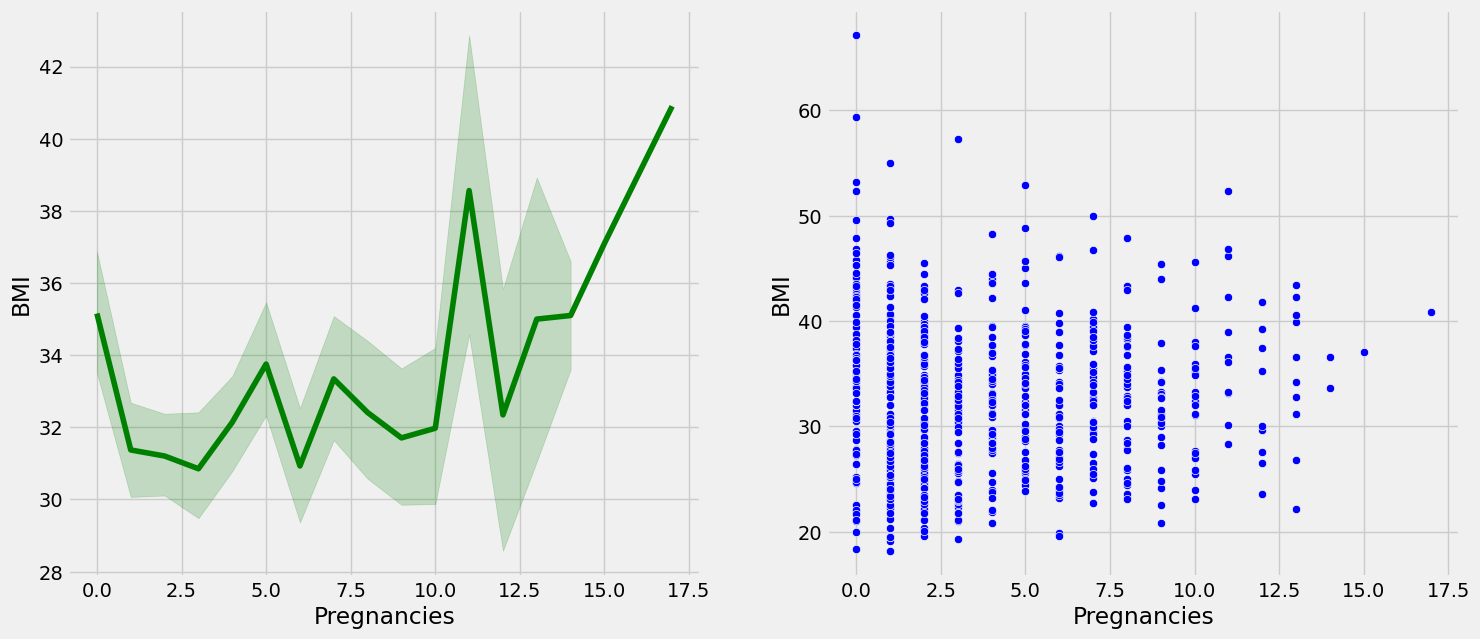

Bivariates between Pregnancies and DiabetesPedigreeFunction


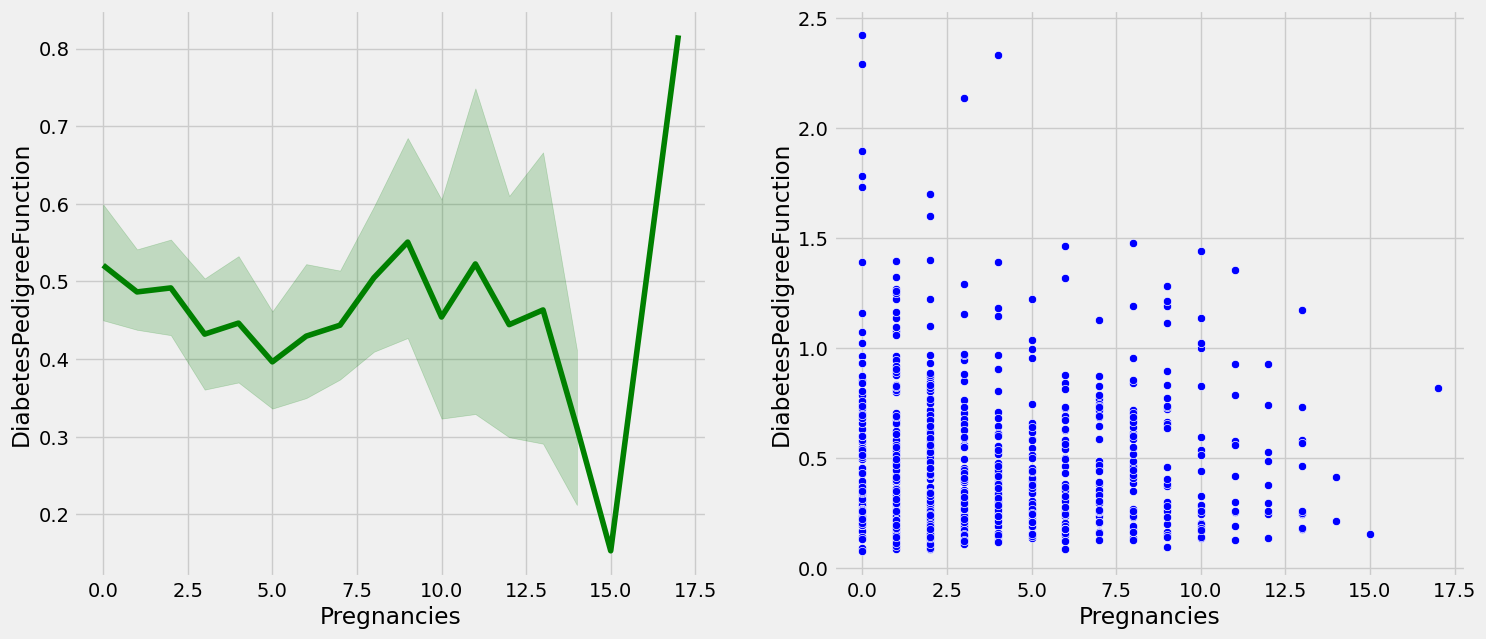

Bivariates between Pregnancies and Age


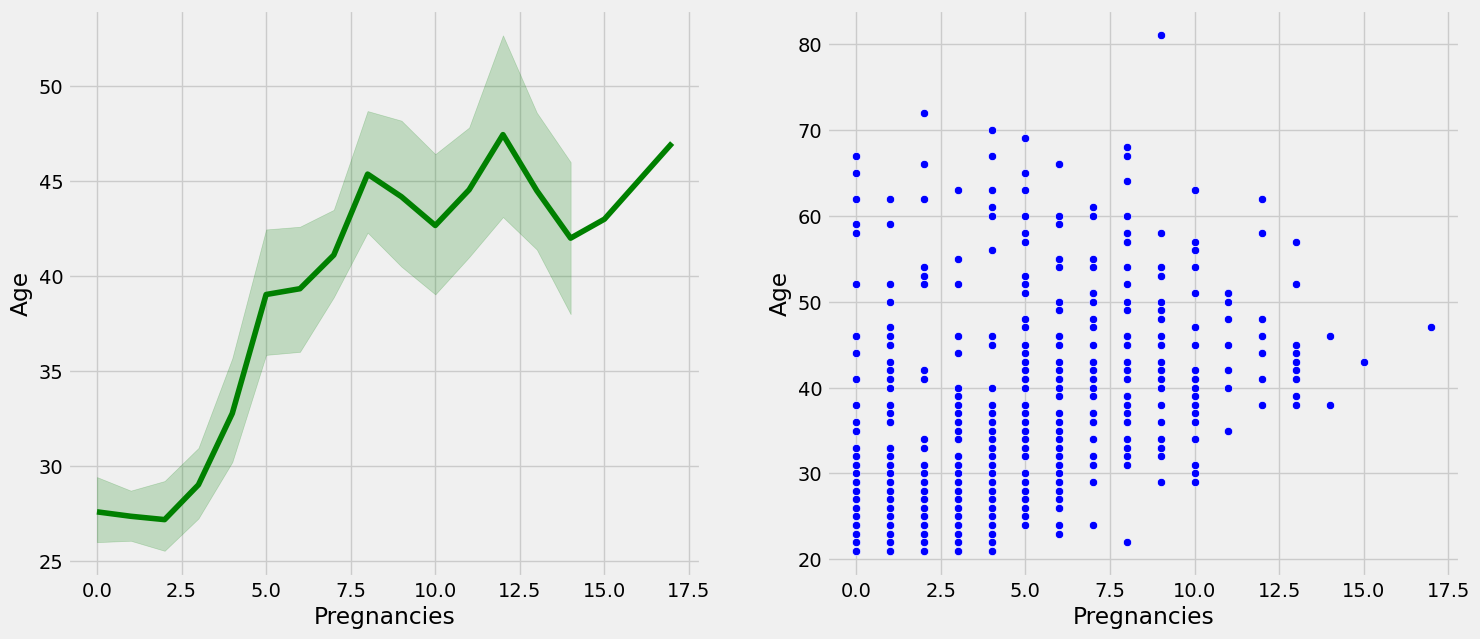

In [25]:
for col in data.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=data, feature1='Pregnancies', feature2=col)
    
    

##### MULTIVARIATE CHARTS

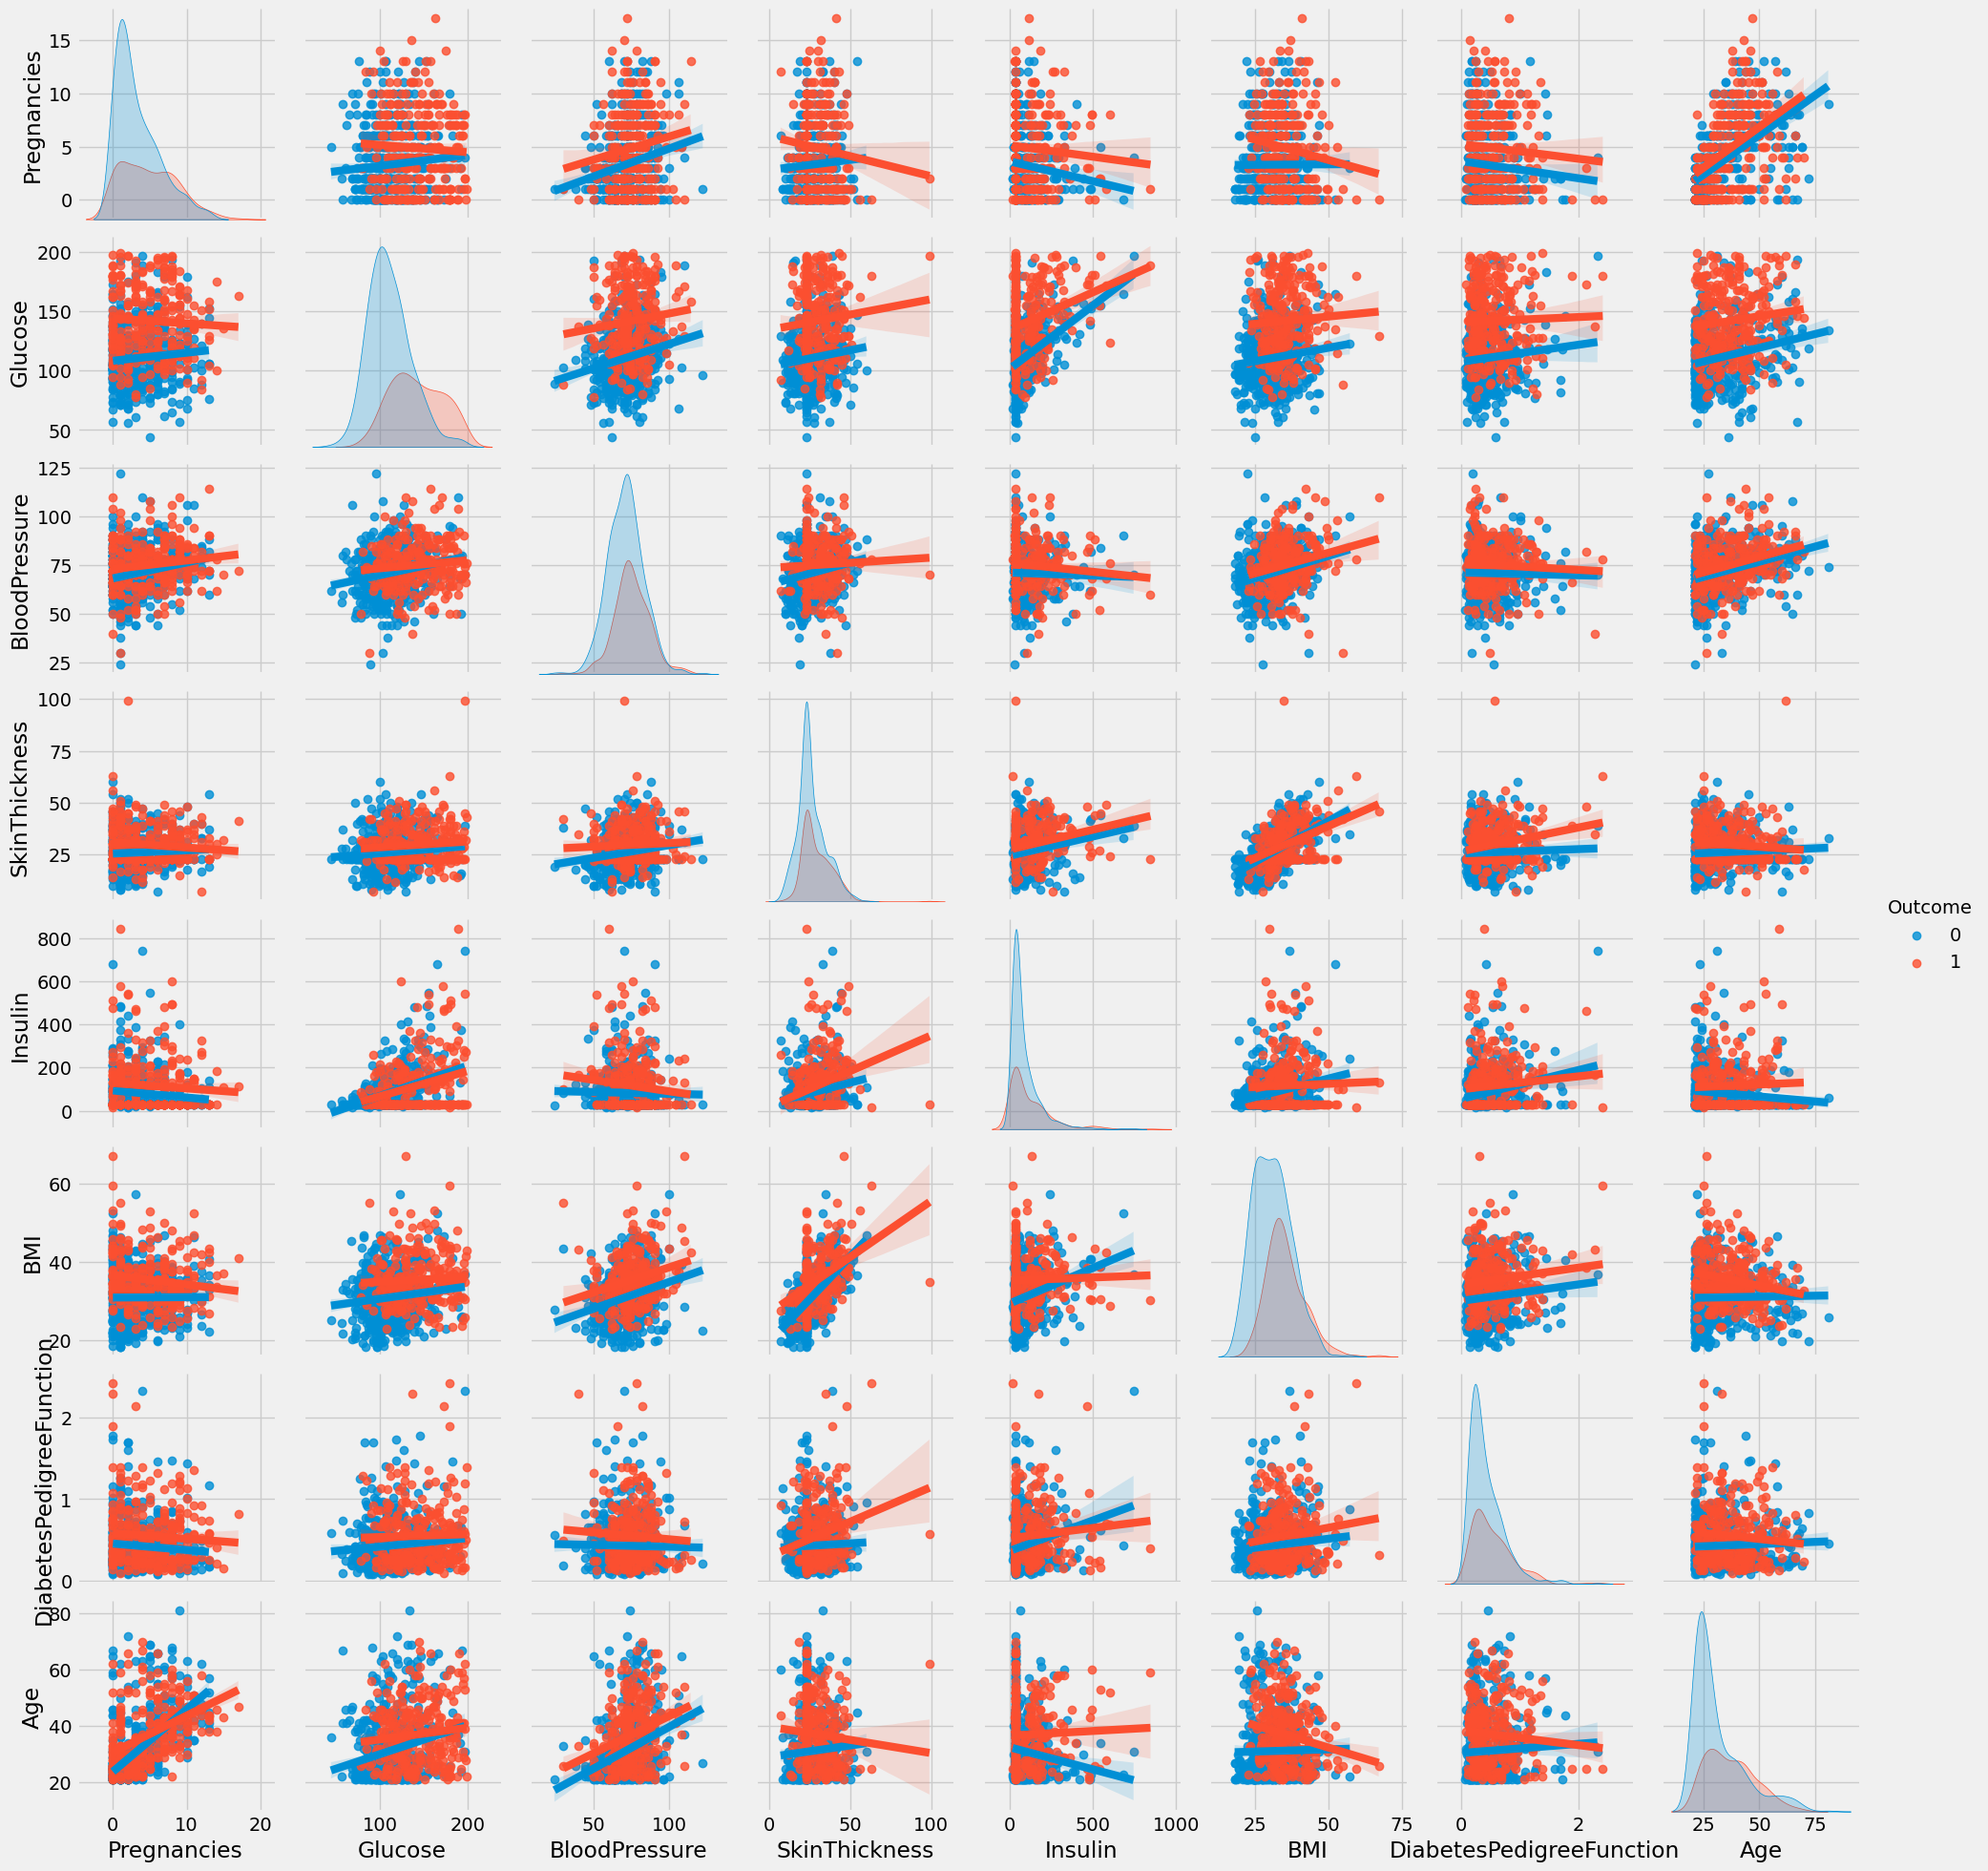

In [26]:
sns.pairplot(data=df, hue='Outcome', kind='reg')

##### Correlations and Heatmaps

In [27]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

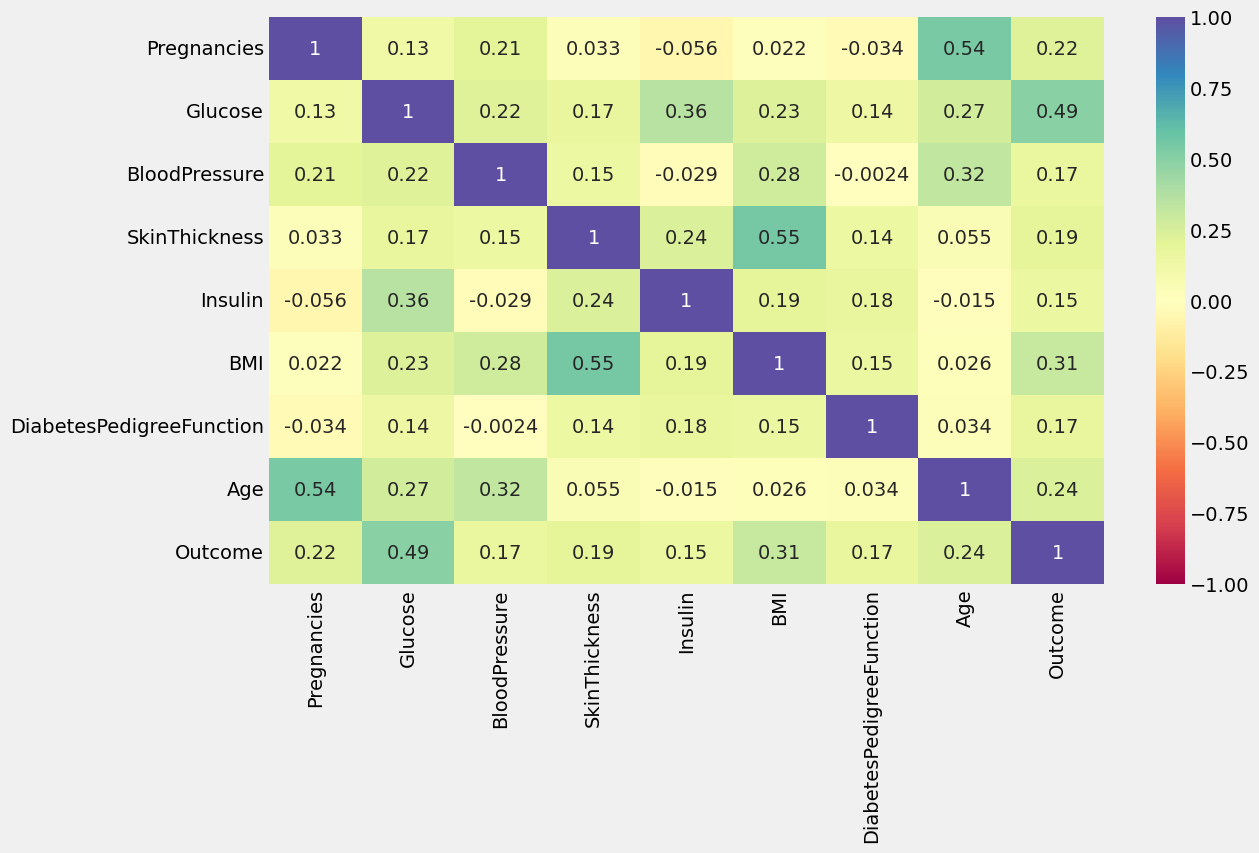

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)

**Observations**
Glucose and BMI seem to be strongest predictors of Diabetes

In [29]:
%%writefile eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("The EDA Page")

def main():
    st.sidebar.subheader("Please choose the plot")
    data=pd.read_csv('data.csv')
    # drop the redundant column
    data=data.drop('Unnamed: 0', axis=1)
    # treat the nulls
    zerofiller=lambda x: x.replace(0, x.median())
    cols=data.columns[1:6]
    data[cols]=data[cols].apply(zerofiller, axis=0)
    #encode categoricals
    df=data.copy()
    d={'Yes':1, 'No':0}
    df['Outcome']=df['Outcome'].map(d)
    
    def histograms(data):
        st.subheader('Univariate Histogram')
        data.hist()
        plt.tight_layout()
        st.pyplot()
    def barchart(data, feature):
        st.subheader("Barchart of Categoricals")
        ax=sns.countplot(data=data, x=feature, color='green')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
        st.pyplot()
        
    def heatmap(data):
        st.subheader("The Heatmap")
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
        st.pyplot()
        
    plot=st.sidebar.selectbox('Choose Plot',('Histograms', 'Barchart', 'Heatmap'))
    if st.sidebar.button("PLOT"):
        if plot=='Histograms':
            histograms(df)
        if plot=='Barchart':
            barchart(data=df, feature='Outcome')
        if plot=='Heatmap':
            heatmap(data=df)
        
if __name__=='__main__':
    main()
        
        

    
    
    

Overwriting eda.py


### Step4. Preprocess the data for modelling
- Seperate features and label
- encode categoricals
- solve data imbalance
- impute nulls
- train test split
- feature scaling

In [30]:
#create a function for preprocessing 
def preprocess(df, label):
    #sepearete features and label
    X=df.drop(label, axis=1)
    y=df[label]
    #balance the data set
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    X,y=sm.fit_resample(X,y)
    # trains test split
    x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [31]:
x_train, x_test, y_train, y_test=preprocess(df, 'Outcome')

In [32]:
#scale the features
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(700, 8) (700,) (300, 8) (300,)


**The data is now ready for modelling**

### Step5  Fit and Evalaute various Models

In [34]:
#function to print metrics
def print_metrics(y_test, y_pred, model):
    print("Metrics for the model", model)
    print('')
    print("Accuracy score is ",accuracy_score(y_test, y_pred))
    print('')
    print("recall score is ",recall_score(y_test, y_pred))
    print('')
    print("Precision score is ",precision_score(y_test, y_pred))
    print('')
    print("F1 score is ",f1_score(y_test, y_pred))
    print('')
    print("ROC score is ",roc_auc_score(y_test, y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print('Classification report')
    print(classification_report(y_test, y_pred))
    

In [57]:
def plot_metrics(clf, x_test, y_test, model):
    print("Metric Plots for model", model)
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [58]:
# crete and fit a KNN model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the model KNN

Accuracy score is  0.75

recall score is  0.8543046357615894

Precision score is  0.7087912087912088

F1 score is  0.7747747747747747

ROC score is  0.7492999688875062
Confusion Matrix
[[ 96  53]
 [ 22 129]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       149
           1       0.71      0.85      0.77       151

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300



Metric Plots for model KNN




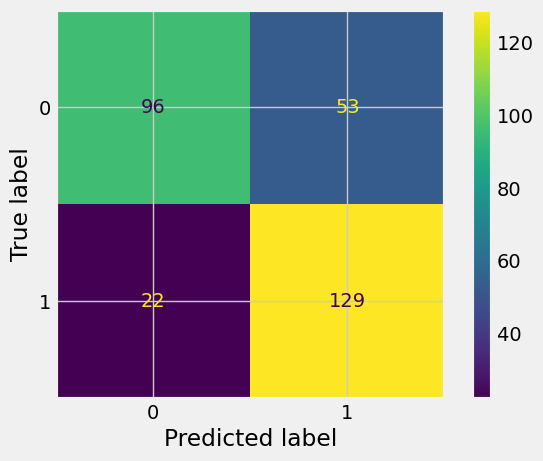

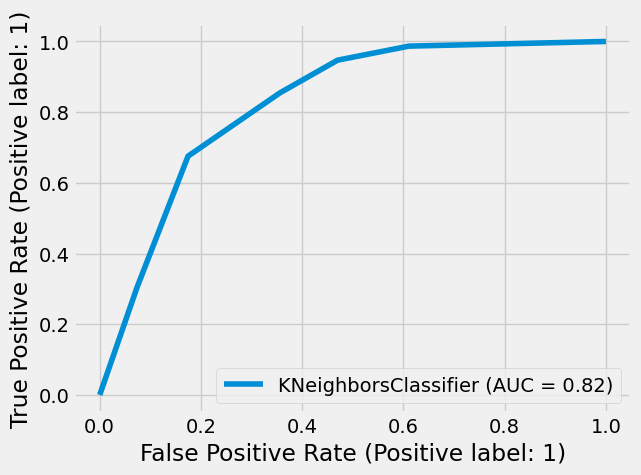

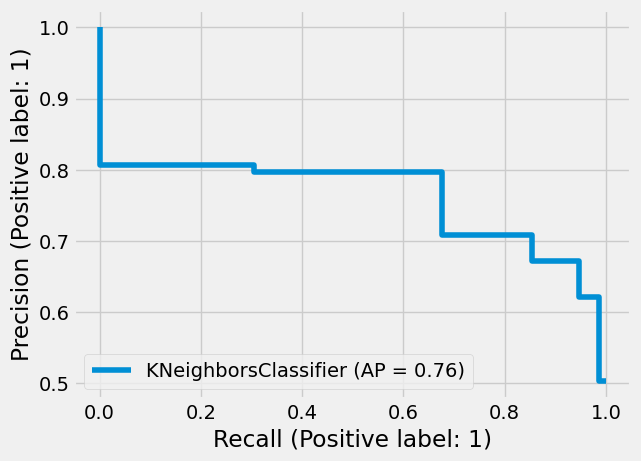

In [59]:
plot_metrics(knn, x_test, y_test, 'KNN')

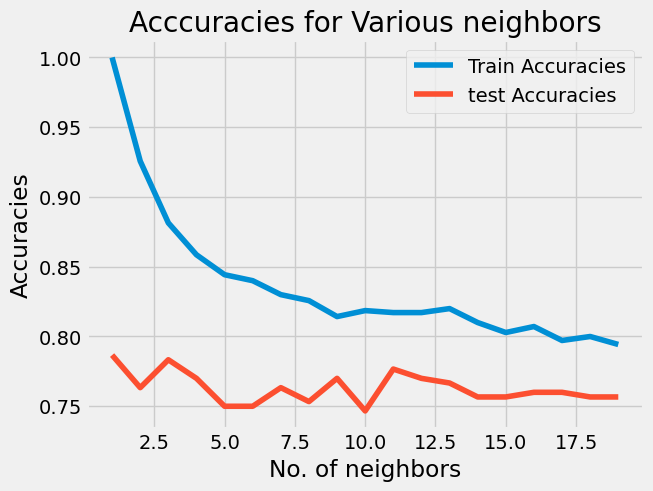

In [60]:
# lets try to optimize the KNN usibng a model complexitty curve
neighbors=np.arange(1,20)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

# enumerate along the neighbors
for i, k in enumerate (neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracies[i]=knn.score(x_train, y_train)
    test_accuracies[i]=knn.score(x_test, y_test)
#plot the model complexity curves
plt.title("Acccuracies for Various neighbors")
plt.plot(neighbors, train_accuracies,label='Train Accuracies')
plt.plot(neighbors, test_accuracies, label='test Accuracies')
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracies')
plt.show()

In [61]:
# the knn model appears to be optimum at k=11
# crete and fit a KNN model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the model KNN

Accuracy score is  0.7766666666666666

recall score is  0.9072847682119205

Precision score is  0.7210526315789474

F1 score is  0.8035190615835777

ROC score is  0.7757900351126716
Confusion Matrix
[[ 96  53]
 [ 14 137]]
Classification report
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       149
           1       0.72      0.91      0.80       151

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.77       300
weighted avg       0.80      0.78      0.77       300



In [62]:
# lets select the best model based on f1_score and optimize it 
clfs={
    'KNN':KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs': LogisticRegression(),
    'Decisoin Tree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier(),
    'SVM':SVC()
}

models_report=pd.DataFrame(columns=['model', 'accuracy', 'precision','recall', 'f1_score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print("fitting the model...", clf_name)
    t={
        'model':clf_name, 
        'accuracy':accuracy_score(y_test, y_pred),
        'precision':precision_score(y_test, y_pred),
        'recall':recall_score(y_pred,y_test),
        'f1_score':f1_score(y_pred, y_test)
    }
    models_report=models_report.append(t, ignore_index=True)
models_report=models_report.sort_values(by="f1_score", ascending=False)
models_report
    

fitting the model... KNN
fitting the model... NaiveBayes
fitting the model... Logregs
fitting the model... Decisoin Tree
fitting the model... RandomForest
fitting the model... AdaBoost
fitting the model... GradientBoosting
fitting the model... XGBoost
fitting the model... SVM


,model,accuracy,precision,recall,f1_score
4,RandomForest,0.810000,0.783133,0.783133,0.820189
7,XGBoost,0.790000,0.765060,0.765060,0.801262
6,GradientBoosting,0.780000,0.763975,0.763975,0.788462
8,SVM,0.773333,0.745562,0.745562,0.787500
0,KNN,0.750000,0.708791,0.708791,0.774775
5,AdaBoost,0.763333,0.756410,0.756410,0.768730
2,Logregs,0.760000,0.772414,0.772414,0.756757
3,Decisoin Tree,0.740000,0.748299,0.748299,0.738255
1,NaiveBayes,0.740000,0.796748,0.796748,0.715328


**Random Forest has performed the best . So lets optimize this model**

In [50]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
print_metrics(y_test, y_pred, 'RFC')

Metrics for the model RFC

Accuracy score is  0.8033333333333333

recall score is  0.8543046357615894

Precision score is  0.7771084337349398

F1 score is  0.8138801261829652

ROC score is  0.8029912440552914
Confusion Matrix
[[112  37]
 [ 22 129]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       149
           1       0.78      0.85      0.81       151

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.80       300
weighted avg       0.81      0.80      0.80       300



In [52]:
param_grid={
    'n_estimators':[100,150,200,250],
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,20,2),
    'max_depth':[2,4,'auto'],
    'max_features':['sqrt', 'log2'],
    'criterion':['gini', 'entropy']
}
n_folds=5
cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1,\
                verbose=3, return_train_score=False)
cv.fit(x_train, y_train)



Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 'auto'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20, 2),
                         'n_estimators': [100, 150, 200, 250]},
             verbose=3)

In [63]:
cv.best_score_

0.8099999999999999

In [76]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=5,
                       min_samples_split=4)

In [77]:
rfc_tuned=RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=5,
                       min_samples_split=4)
rfc_tuned.fit(x_train, y_train)
y_pred=rfc_tuned.predict(x_test)
print_metrics(y_test, y_pred, 'Random Forest')

Metrics for the model Random Forest

Accuracy score is  0.7866666666666666

recall score is  0.847682119205298

Precision score is  0.757396449704142

F1 score is  0.7999999999999999

ROC score is  0.7862571669851993
Confusion Matrix
[[108  41]
 [ 23 128]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       149
           1       0.76      0.85      0.80       151

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Model Interpretation


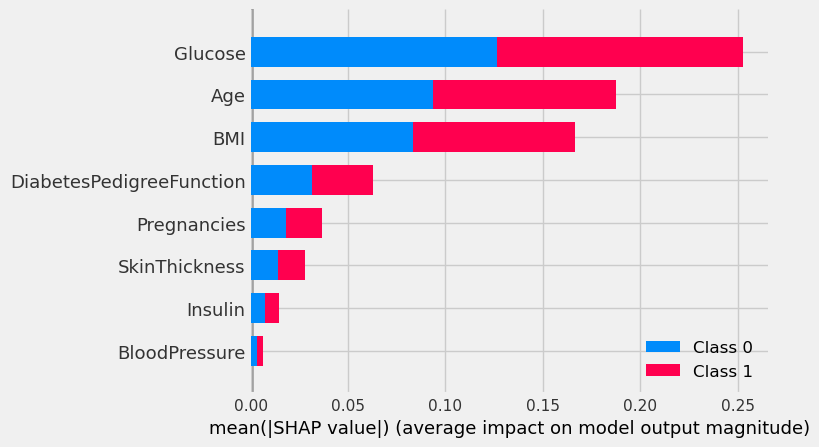

In [74]:
import shap
X=df.drop('Outcome', axis=1)
value=shap.TreeExplainer(rfc_tuned).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=X.columns)

**Glucose , BMI and Age are the strongest predictors of diabetes**

### Step8. Pickle and save the model as a pipeline

In [79]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc_tuned=rfc_tuned
steps=[('scaler', sc), ('rfc_tuned', rfc_tuned)]
pipeline=Pipeline(steps)
x_train, x_test, y_train, y_test=preprocess(df, label='Outcome')
pipeline.fit(x_train, y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'Pipeline')
#plot_metrics(pipeline, x_test, y_test, 'Pipeline')

Metrics for the model Pipeline

Accuracy score is  0.7833333333333333

recall score is  0.8741721854304636

Precision score is  0.7415730337078652

F1 score is  0.8024316109422494

ROC score is  0.7827236766078493
Confusion Matrix
[[103  46]
 [ 19 132]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       149
           1       0.74      0.87      0.80       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



In [80]:
# save the pipeline as  pickle file
import pickle
model=open('rfc.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

### Step9: deploy the model as a streamlit file


In [92]:
%%writefile app.py
import streamlit as st
st.title("Medical DIAGNOSTIC WEB APP")
st.subheader("Is the patient Diabetic?")
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

#Step1: Load the pickled model
model=open('rfc.pickle', 'rb')
clf=pickle.load(model)
model.close()

#Step2: Get the input from the front end user
pregs=st.number_input('Pregnancies',0,17,0)
glucose=st.slider('Glucose',40, 200,40)
bp=st.slider('BloodPressure',20,140, 20)
skin=st.slider('SkinThickness',7.0, 99.0, 7.0)
insulin=st.slider('Insulin',14,850, 14)
bmi=st.slider('BMI',18, 67, 18)
dpf=st.slider('DiabetesPedigreeFunction',0.05, 2.50, 0.05)
age=st.slider('Age', 20, 90, 20)

# Step 3 : collect the front end user input as model input data
data={
    'Pregnancies':pregs,
    'Glucose':glucose,
    'BloodPressure':bp,
    'SkinThickness':skin, 
    'Insulin':insulin,
    'BMI':bmi, 
    'DiabetesPedigreeFunction':dpf, 
    'Age':age}
input_data=pd.DataFrame([data])

# Step4: get the predictions and print the result
preds=clf.predict(input_data)[0]
if st.button("Predict"):
    if preds==1:
        st.error('Diabetic')
    if preds==0:
        st.success("Non Diabetic")


Overwriting app.py


In [87]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
x_train, x_test, y_train, y_test=preprocess(df,'Outcome')

In [19]:
# scale the featires
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
#check the shapes of the data piecvves
print(x_train.shape, y_train.shape ,x_test.shape,  y_test.shape)

(700, 8) (700,) (300, 8) (300,)


**The data is prepared for modelling** 

### 5. Fit and Evlaute various Models

In [21]:
# create a function for model evaluation
def print_metrics(y_test, y_pred, model):
    print("Metrics for the model", model)
    print('')
    print("Accuracy of the model", accuracy_score(y_test, y_pred))
    print('')
    print("Recall of the model", recall_score(y_test, y_pred))
    print('')
    print("Precision of the model", precision_score(y_test, y_pred))
    print('')
    print("F1 score of the model", f1_score(y_test, y_pred))
    print('')
    print("ROC score of the model", roc_auc_score(y_test, y_pred))
    print('The confuision matrix is below')
    print(confusion_matrix(y_test, y_pred))
    print('The Classification Report')
    print(classification_report(y_test, y_pred))

In [22]:
def plot_metrics(clf,x_test,y_test, model_name):
    print("Metric Plots for Model", model_name)
    plot_confusion_matrix(clf,x_test,y_test, display_labels=[0,1] )
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf,x_test, y_test)
    plt.show()

In [23]:
# lets fit the first model which is KNN
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the model KNN

Accuracy of the model 0.76

Recall of the model 0.8741721854304636

Precision of the model 0.7135135135135136

F1 score of the model 0.7857142857142857

ROC score of the model 0.7592337437219432
The confuision matrix is below
[[ 96  53]
 [ 19 132]]
The Classification Report
              precision    recall  f1-score   support

           0       0.83      0.64      0.73       149
           1       0.71      0.87      0.79       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



Metric Plots for Model KNN




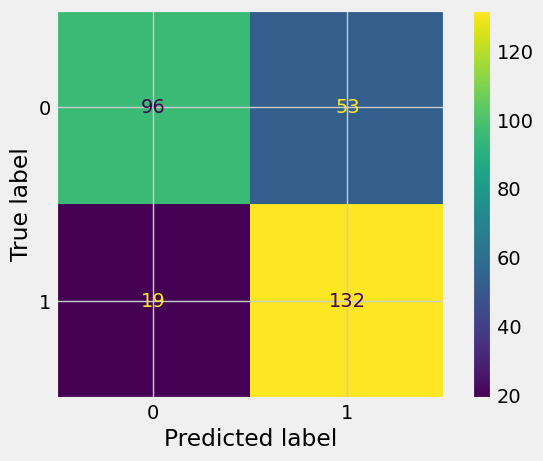

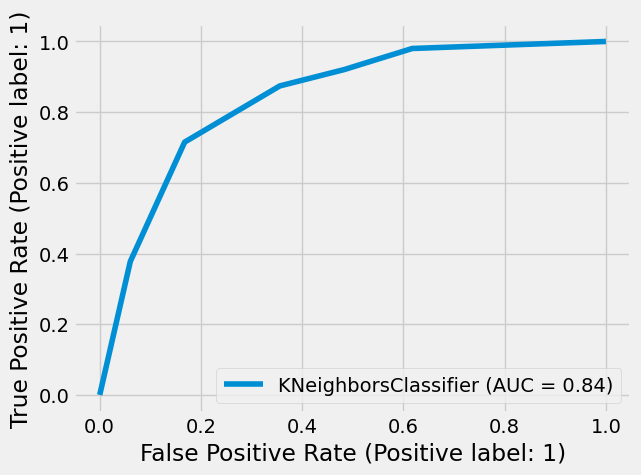

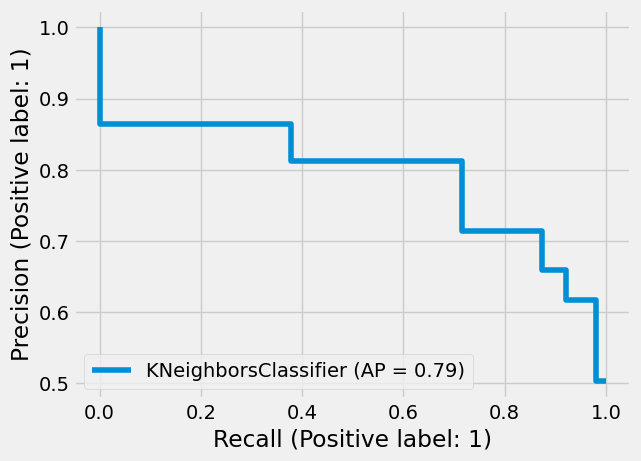

In [24]:
plot_metrics(knn,x_test, y_test, 'KNN')

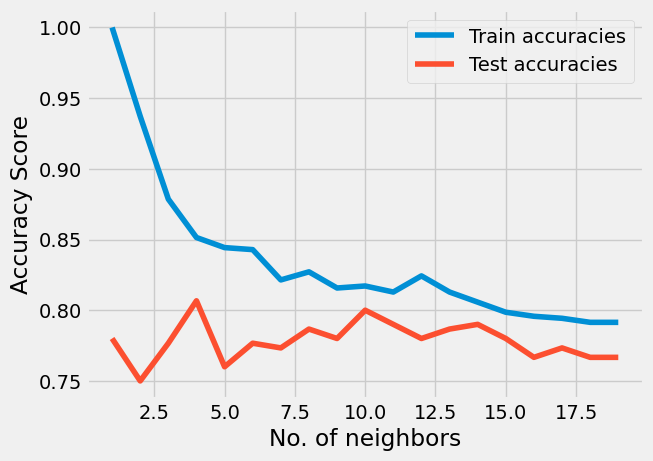

In [25]:
# Lets optimize the KNNmodel with a model complexity curve
neighbors=np.arange(1,20)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

# enumertae through neighbors
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    train_accuracies[i]=knn.score(x_train, y_train)
    test_accuracies[i]=knn.score(x_test, y_test)

# plot the train and test curves
plt.plot(neighbors, train_accuracies, label='Train accuracies')
plt.plot(neighbors, test_accuracies,label='Test accuracies')
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel("Accuracy Score")
plt.show()

**The optimum value of k seems 13**

In [26]:
# lets fit the first model which is KNN
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the model KNN

Accuracy of the model 0.7866666666666666

Recall of the model 0.9072847682119205

Precision of the model 0.732620320855615

F1 score of the model 0.8106508875739645

ROC score of the model 0.7858571492066315
The confuision matrix is below
[[ 99  50]
 [ 14 137]]
The Classification Report
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       149
           1       0.73      0.91      0.81       151

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.78       300
weighted avg       0.80      0.79      0.78       300



**So we have optimized the KNN value and enhanced the precision to 74% and recall to 84% and f score to 81%. Thus we have to do for each and every model till we find the most satisfactory model for this datset and use case. But tghere is a smarter way**

In [27]:
# fit all classifier and collect theresult in a data frame
clfs={
    'KNN':KNeighborsClassifier(),
    'Logreg': LogisticRegression(),
    'NaiveBayes':GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XgBoost':XGBClassifier(),
    'SVM': SVC()
}

models_report=pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print('fitting the model...', clf_name)
    y_pred=clf.predict(x_test)
    t={'model_name':clf_name,
       'accuracy':accuracy_score(y_pred, y_test), 
       'precision': precision_score(y_pred,y_test),
       'recall':recall_score(y_pred, y_test), 
       'f1_score':f1_score(y_pred, y_test), 
       'roc_auc_score':roc_auc_score(y_pred, y_test)
    }
    models_report=models_report.append(t, ignore_index=True)
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

fitting the model... KNN
fitting the model... Logreg
fitting the model... NaiveBayes
fitting the model... Decision Tree
fitting the model... RandomForest
fitting the model... AdaBoost
fitting the model... GradientBoosting
fitting the model... XgBoost
fitting the model... SVM


,model_name,accuracy,precision,recall,f1_score,roc_auc_score
4,RandomForest,0.813333,0.874172,0.781065,0.825000,0.818013
8,SVM,0.806667,0.874172,0.771930,0.819876,0.812322
7,XgBoost,0.800000,0.867550,0.766082,0.813665,0.805522
6,GradientBoosting,0.786667,0.834437,0.763636,0.797468,0.789226
0,KNN,0.760000,0.874172,0.713514,0.785714,0.774148
1,Logreg,0.760000,0.754967,0.765101,0.760000,0.760034
2,NaiveBayes,0.766667,0.721854,0.795620,0.756944,0.768976
5,AdaBoost,0.750000,0.761589,0.746753,0.754098,0.750089
3,Decision Tree,0.736667,0.801325,0.711765,0.753894,0.740498


**Random Forest has performed the best. Sow e optimkize it using Gridsearch**

### Step6: Optimize the chosen model

In [28]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
print_metrics(y_test, y_pred, 'Random Forest')

Metrics for the model Random Forest

Accuracy of the model 0.8133333333333334

Recall of the model 0.8940397350993378

Precision of the model 0.7714285714285715

F1 score of the model 0.8282208588957055

ROC score of the model 0.8127916796302057
The confuision matrix is below
[[109  40]
 [ 16 135]]
The Classification Report
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       149
           1       0.77      0.89      0.83       151

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [31]:
param_grid={
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_features':['sqrt', 'log2'],
    'max_depth':[2,5,'auto'],
    'criterion':['gini', 'entropy']
}
n_folds=3
cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1, verbose=3)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 'auto'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=3)

In [32]:
cv.best_score_

0.8113788929239574

In [63]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=200)

In [34]:
tuned_rfc=cv.best_estimator_
tuned_rfc.fit(x_train, y_train)
y_pred=tuned_rfc.predict(x_test)
print_metrics(y_test, y_pred, 'Tuned Random Forest')

Metrics for the model Tuned Random Forest

Accuracy of the model 0.7933333333333333

Recall of the model 0.8807947019867549

Precision of the model 0.751412429378531

F1 score of the model 0.8109756097560975

ROC score of the model 0.792746344281968
The confuision matrix is below
[[105  44]
 [ 18 133]]
The Classification Report
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       149
           1       0.75      0.88      0.81       151

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



### Step7. Interpret the optimized model

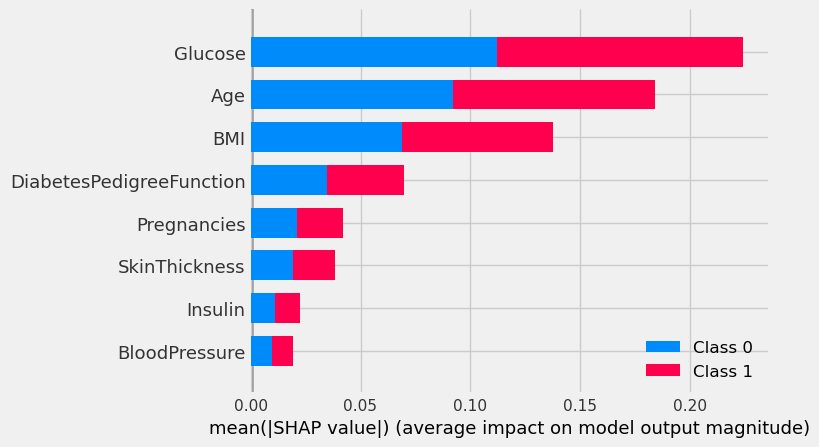

In [39]:
import shap
X=df.drop('Outcome', axis=1)
y=df.Outcome
value=shap.TreeExplainer(tuned_rfc).shap_values(x_test)
shap.summary_plot(value, x_train,plot_type='bar', feature_names=X.columns )

### Step 8. Pickle and save the model as a pipeline

In [64]:
#Save the Pipeline 
from sklearn.pipeline import Pipeline
import pickle
sc=StandardScaler()
rfc=RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=200)
x_train, x_test, y_train, y_test=preprocess(df, 'Outcome')
steps=[('sc', sc), ('tuned_rfc', rfc)]
pipeline=Pipeline(steps)
pipeline.fit(x_train, y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'pipeline')

Metrics for the model pipeline

Accuracy of the model 0.8066666666666666

Recall of the model 0.8675496688741722

Precision of the model 0.7751479289940828

F1 score of the model 0.81875

ROC score of the model 0.8062580559135961
The confuision matrix is below
[[111  38]
 [ 20 131]]
The Classification Report
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       149
           1       0.78      0.87      0.82       151

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [66]:
import pickle
model=open('rfc.pickle','wb')
pickle.dump(rfc, model)
model.close()



### Step9. Deploy the model pipeline in streamlit

In [42]:
!pip install streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.



  Using cached streamlit-1.19.0-py2.py3-none-any.whl (9.6 MB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
  Using cached validators-0.20.0-py3-none-any.whl
  Using cached protobuf-3.20.3-cp38-cp38-win_amd64.whl (904 kB)
  Using cached blinker-1.5-py2.py3-none-any.whl (12 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached pyarrow-11.0.0-cp38-cp38-win_amd64.whl (20.6 MB)
  Using cached rich-13.3.2-py3-none-any.whl (238 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached Pygments-2.14.0-py3-none-any.whl (1.1 MB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)
  Using cached tzdata-2022.7-py2.py3-none-any.w

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [67]:
%%writefile app.py
import streamlit as st
st.title("Medical Diagnostic Web App")
import pandas as pd
import numpy as np
import pickle

st.subheader("Is the person diabetic or not?")
# Step1 : Load the picked pipeline
model=open("rfc.pickle", 'rb')
clf=pickle.load(model)
model.close()


# Step2: Get the input from the front end user
pregs=st.number_input('Pregnancies',0,20,0)
glucose=st.slider('Glucose',44,199,44)
bp=st.slider('BloodPressure',20,140,20) 
skin=st.slider('SkinThickness',7.0,99.0,7.0)
insulin=st.slider('Insulin',10, 900,10)
bmi=st.slider('BMI',15, 70,15)
dpf=st.slider('DiabetesPedigreeFunction',0.50, 2.50,0.05)
age=st.slider('Age',20, 90, 20)

# Step3: Get the model input
data={
    'Pregnancies':pregs,
    'Glucose':glucose, 
    'BloodPressure':bp,
    'SkinThickness':skin, 
    'Insulin':insulin,
    'BMI':bmi, 
    'DiabetesPedigreeFunction':dpf, 
    'Age':age}

input_data=pd.DataFrame([data])

# Step4: Get the prediction and print the result
prediction=clf.predict(input_data)[0]
st.write(prediction)
if st.button("Predict"):
    if prediction==1:
        st.error("Diabetic")
    if prediction==0:
        st.success("Healthy")

Overwriting app.py


### Step7. Interpret the optimized model

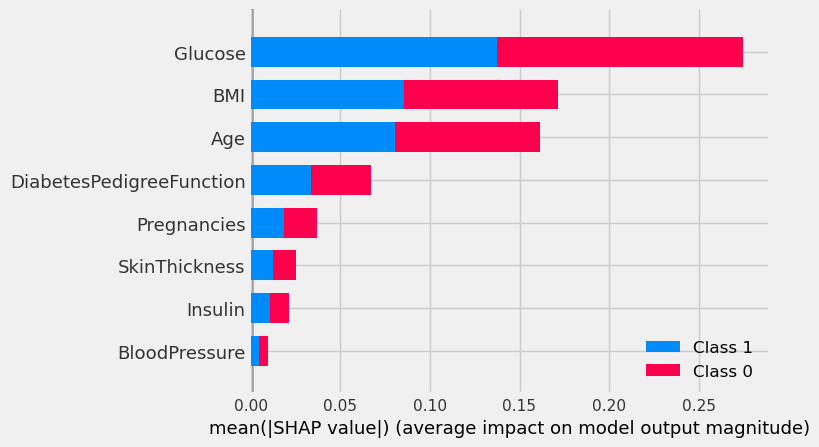

In [68]:
import shap
X=df.drop('Outcome', axis=1)
value=shap.TreeExplainer(rfc).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=X.columns)

### Step 8: Pickle and save the model as a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc=rfc